<a href="https://colab.research.google.com/github/Sabri3299/M-L-Project/blob/M-L/Dog_and_Cat_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [5]:
import os  # for accessing files
import pandas as a
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2  # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image #PIL -> pillow libary used for image processing libraries
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #extracting the compessed Dataset
from zipfile import ZipFile
dataset='/content/drive/MyDrive/archive (2).zip'

with ZipFile(dataset,'r') as zip:  # r for reading the file
  zip.extractall()
  print('the dataset is extacted')

the dataset is extacted


In [7]:
cat_files=os.listdir('/content/dataset/training_set/cats') # create list contain files with mask
print(cat_files[:5])  # print the first five elements
print(cat_files[-5:]) # print the last five elements of the list

['cat.1846.jpg', 'cat.815.jpg', 'cat.553.jpg', 'cat.3438.jpg', 'cat.2133.jpg']
['cat.3280.jpg', 'cat.343.jpg', 'cat.745.jpg', 'cat.2863.jpg', 'cat.592.jpg']


In [8]:
dog_files=os.listdir('/content/dataset/training_set/dogs') # create list contain files without mask
print(dog_files[:5])  # print the first five elements
print(dog_files[-5:])  # print the last five elements of the list

['dog.1166.jpg', 'dog.1497.jpg', 'dog.3077.jpg', 'dog.3076.jpg', 'dog.3129.jpg']
['dog.635.jpg', 'dog.922.jpg', 'dog.3042.jpg', 'dog.2735.jpg', 'dog.1897.jpg']


In [10]:
print('Number of cat images:',len(cat_files))
print('number of dog images:', len(dog_files))

Number of cat images: 4000
number of dog images: 4000


Creating lables for the two class of images

with masks-> 0


withoutmask -> 1


In [12]:
#creating the labels
cat_files_labels = [0]*4000
dog_files_labels = [1]*4000

In [14]:
print(cat_files_labels[:5])
print(dog_files_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [15]:
print(len(cat_files_labels))
print(len(dog_files_labels))

4000
4000


In [16]:
labels = cat_files_labels + dog_files_labels # adding the to list

print(len(labels))
print(labels[0:5])
print(labels[-5:])

8000
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


Displaying the images


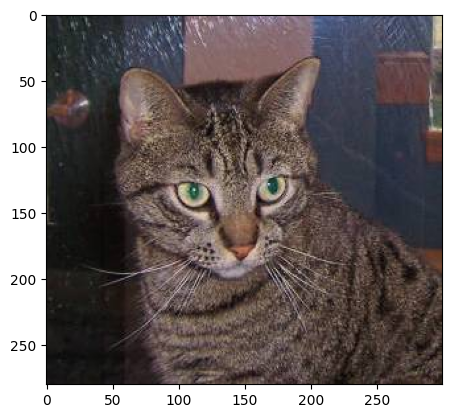

In [17]:
# disalaying with catimage
img=mpimg.imread('/content/dataset/training_set/cats/cat.1.jpg') # read the image into numpy array
imgplot = plt.imshow(img)
plt.show()

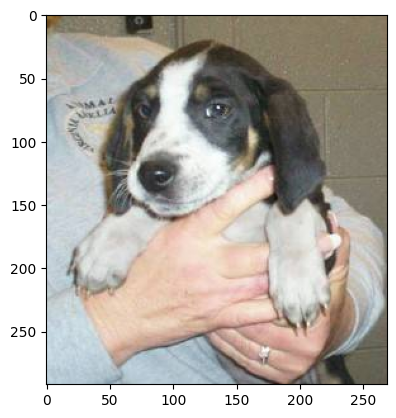

In [18]:
#displaying dog image
img = mpimg.imread('/content/dataset/training_set/dogs/dog.10.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the images

image processing

1.Resize the images


2.Convert the images to numpy arrays

In [21]:
#convert images to numpy arrays
cat_files_path = '/content/dataset/training_set/cats/' # don't forgot to add /
data = [] # create a empty list


for img_file in os.listdir(cat_files_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(cat_files_path, img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(cat_files_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


In [23]:
dog_files_path = '/content/dataset/training_set/dogs/'
for img_file in os.listdir(dog_files_path): #Iterate over files in the "with_mask_path" directory
    img_path = os.path.join(dog_files_path ,img_file)
    if os.path.isfile(img_path): # check if "img_path" is a file
       image = Image.open(dog_files_path + img_file)  # open the all file example  /content/data/with_mask/with_mask_894.jpg
       image = image.resize((128,128)) #convert all the images  dimensions to 128 x 128
       image = image.convert('RGB')    # converting all the images to RGB
       image = np.array(image)         # converting to numpy array
       data.append(image)              # adding image to data


array([[[ 46,  52,  38],
        [ 59,  67,  46],
        [ 59,  67,  46],
        ...,
        [ 91,  82,  55],
        [114, 111,  87],
        [128, 118,  90]],

       [[ 50,  54,  41],
        [ 61,  66,  47],
        [ 60,  66,  46],
        ...,
        [ 93,  84,  56],
        [115, 111,  88],
        [128, 117,  93]],

       [[ 53,  55,  42],
        [ 62,  65,  46],
        [ 62,  66,  46],
        ...,
        [ 97,  88,  60],
        [112, 108,  85],
        [128, 117,  96]],

       ...,

       [[ 51,  52,  38],
        [ 46,  47,  36],
        [ 39,  40,  31],
        ...,
        [144, 129, 100],
        [146, 131, 102],
        [148, 134, 105]],

       [[ 77,  74,  50],
        [ 73,  68,  47],
        [ 64,  60,  41],
        ...,
        [145, 133, 104],
        [143, 132, 102],
        [146, 132, 103]],

       [[ 87,  83,  57],
        [ 84,  79,  56],
        [ 78,  73,  53],
        ...,
        [145, 134, 104],
        [146, 134, 104],
        [146, 132, 103]]], dtype=uint8)
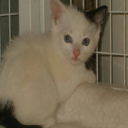

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Train test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [32]:
print(X.shape, x_train.shape, x_test.shape)

(8000, 128, 128, 3) (6400, 128, 128, 3) (1600, 128, 128, 3)


In [33]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [34]:
x_train_scaled[0]

array([[[0.42745098, 0.40784314, 0.42352941],
        [0.45882353, 0.43921569, 0.45098039],
        [0.43137255, 0.41176471, 0.42745098],
        ...,
        [0.24705882, 0.19607843, 0.22352941],
        [0.23137255, 0.18431373, 0.21176471],
        [0.24313725, 0.19607843, 0.22352941]],

       [[0.42745098, 0.40392157, 0.41960784],
        [0.43529412, 0.41176471, 0.42745098],
        [0.43529412, 0.41176471, 0.42745098],
        ...,
        [0.27058824, 0.23137255, 0.25098039],
        [0.2745098 , 0.23137255, 0.26666667],
        [0.26666667, 0.22352941, 0.26666667]],

       [[0.42352941, 0.38823529, 0.40784314],
        [0.40392157, 0.36862745, 0.38823529],
        [0.41568627, 0.38039216, 0.4       ],
        ...,
        [0.26666667, 0.24313725, 0.25882353],
        [0.29019608, 0.2627451 , 0.29411765],
        [0.28627451, 0.25490196, 0.29803922]],

       ...,

       [[0.45098039, 0.43921569, 0.4745098 ],
        [0.49411765, 0.48235294, 0.51764706],
        [0.51372549, 0

Building a convolutional Netural Networks (CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [38]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
180/180 [==============================] - 10s 19ms/step - loss: 0.6720 - acc: 0.6012 - val_loss: 0.6202 - val_acc: 0.6984
Epoch 2/5
180/180 [==============================] - 3s 16ms/step - loss: 0.5940 - acc: 0.6896 - val_loss: 0.5692 - val_acc: 0.6891
Epoch 3/5
180/180 [==============================] - 3s 18ms/step - loss: 0.5121 - acc: 0.7436 - val_loss: 0.5509 - val_acc: 0.7234
Epoch 4/5
180/180 [==============================] - 3s 17ms/step - loss: 0.4240 - acc: 0.8040 - val_loss: 0.6291 - val_acc: 0.7203
Epoch 5/5
180/180 [==============================] - 3s 16ms/step - loss: 0.3143 - acc: 0.8632 - val_loss: 0.6819 - val_acc: 0.7234


model evaluation

In [39]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

50/50 [==============================] - 1s 16ms/step - loss: 0.5969 - acc: 0.7369
Test Accuracy=  0.7368749976158142


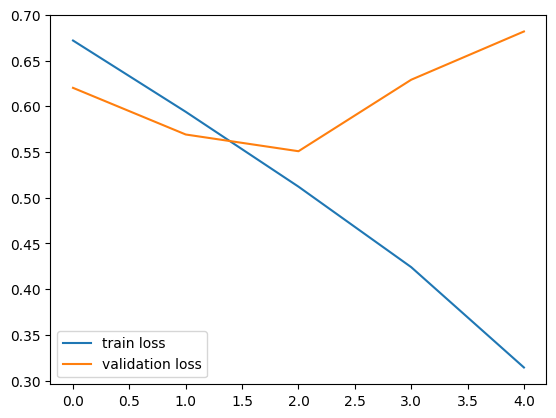

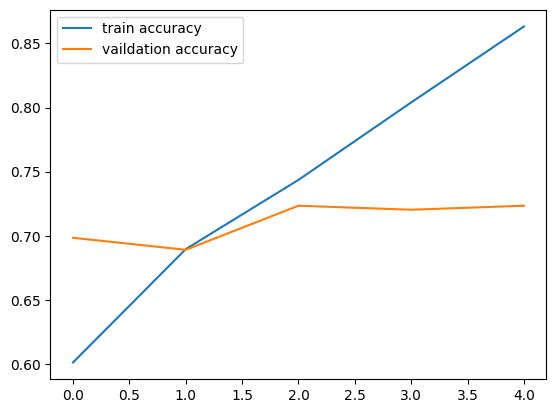

In [40]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive System

path of the image to be pedicted: /content/dataset/test_set/dogs/dog.4002.jpg


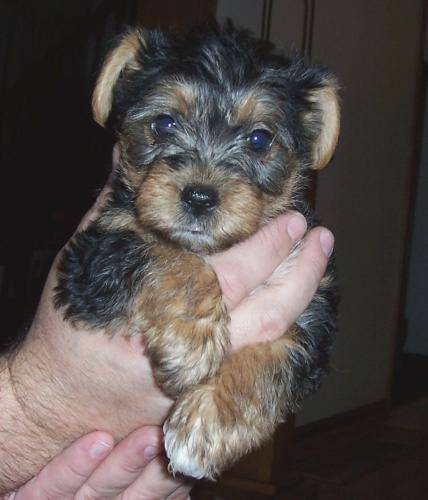

1/1 [==============================] - 0s 369ms/step
[[0.79131734 0.45783496]]
0
It is a Dog


In [41]:
# @title Default title text
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('It is a cat')

else:
  print('It is a Dog')